# Classification of Handwritten Digits

In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from IPython.display import display





# First we read our data for train test 'azip' and 'dzip' for train set
# and 'dtest', 'testzip' for test set
train_data=pd.read_excel('C:/Users/panos/Desktop/Παναγιώτης/ΜΑΠ ΔΠΜΣ/ΑΝΑΛΥΣΗ ΔΕΔΟΜΕΝΩΝ ΜΕ PYTHON/Homework-3/project_svd_handwritten-3/data.xlsx',sheet_name='azip',index_col=None,convert_float=False,header=None)
train_models=pd.read_excel('C:/Users/panos/Desktop/Παναγιώτης/ΜΑΠ ΔΠΜΣ/ΑΝΑΛΥΣΗ ΔΕΔΟΜΕΝΩΝ ΜΕ PYTHON/Homework-3/project_svd_handwritten-3/data.xlsx',sheet_name='dzip',index_col=None,convert_float=False,header=None)
test_data=pd.read_excel('C:/Users/panos/Desktop/Παναγιώτης/ΜΑΠ ΔΠΜΣ/ΑΝΑΛΥΣΗ ΔΕΔΟΜΕΝΩΝ ΜΕ PYTHON/Homework-3/project_svd_handwritten-3/data.xlsx',sheet_name='testzip',index_col=None,convert_float=False,header=None)
test_models=pd.read_excel('C:/Users/panos/Desktop/Παναγιώτης/ΜΑΠ ΔΠΜΣ/ΑΝΑΛΥΣΗ ΔΕΔΟΜΕΝΩΝ ΜΕ PYTHON/Homework-3/project_svd_handwritten-3/data.xlsx',sheet_name='dtest',index_col=None,convert_float=False,header=None)




# Make a list of every digit's matrix
A=[]
for i in range(10):
    A.append(train_data.loc[:,list(train_models.loc[0,:]==i)].values)

    

# Calculate the SVD analysis for all the above matrices
train_u=[]
train_s=[]
train_v=[]
for i in range(10):
    u,s,v=np.linalg.svd(A[i], full_matrices=False)
    train_u.append(u)
    train_s.append(s)
    train_v.append(v)

C:\Users\panos\AppData\Local\Temp\ipykernel_10908\3073067599.py:14: FutureWarning: convert_float is deprecated and will be removed in a future version.
  train_data=pd.read_excel('C:/Users/panos/Desktop/Παναγιώτης/ΜΑΠ ΔΠΜΣ/ΑΝΑΛΥΣΗ ΔΕΔΟΜΕΝΩΝ ΜΕ PYTHON/Homework-3/project_svd_handwritten-3/data.xlsx',sheet_name='azip',index_col=None,convert_float=False,header=None)
C:\Users\panos\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\panos\AppData\Local\Temp\ipykernel_10908\3073067599.py:15: FutureWarning: convert_float is deprecated and will be removed in a future version.
  train_models=pd.read_excel('C:/Users/panos/Desktop/Παναγιώτης/ΜΑΠ ΔΠΜΣ/ΑΝΑΛΥΣΗ ΔΕΔΟΜΕΝΩΝ ΜΕ PYTHON/Homework-3/project_svd_handwritten-3/data.xlsx',sheet_name='dzip',index_col=None,convert_float=False,header=None)
C:\Users\panos\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWa

In [3]:
# We use the first 5-20 singular vectors as basis and classify unknown test digits according to how well they can be 
# represented in terms of the respective bases
# Take as measure the relative residual vector in the least squares problem 
# The best score is achieved by using k=18
I=np.eye(test_data.shape[0])
k1=np.arange(5,21)             # number of basis
prediction=np.zeros((test_models.shape[1],0))  
accuracy=[]

for i in k1:
    pred1=[]
    for j in range(test_data.shape[1]):
        res1=[]
        for t in range(10):
            u=train_u[t][:,:i]
            res1.append(np.linalg.norm(np.dot(I-np.dot(u,u.T), test_data[j])))
        pred1.append(np.argmin(res1))
    pred1=np.array(pred1)
    prediction=np.hstack((prediction,pred1.reshape(-1,1)))

for i in range(len(k1)):
    score=accuracy_score(test_models.loc[0,:],prediction[:,i])
    accuracy.append(score)


digit_accuracy=pd.DataFrame({'Number of basis vectors':k1, 
                             'Percentages (%)':np.dot(accuracy,100)}).set_index('Number of basis vectors')

digit_accuracy=digit_accuracy.style.set_caption('Percentages of correctly classified digits as a function of the number of basis vectors').set_table_styles([{'selector':'caption', 
'props':[('font-size', '16px'), ('text-align','center'), ('color','black'), ('font-style', 'italic'), ('font-weight', 'bold')] }])

display(digit_accuracy)

,Percentages (%)
Number of basis vectors,
5,90.284006
6,90.533134
7,91.679123
8,92.027902
9,92.625810
10,93.173891
11,93.223717
12,93.572496
13,93.622322


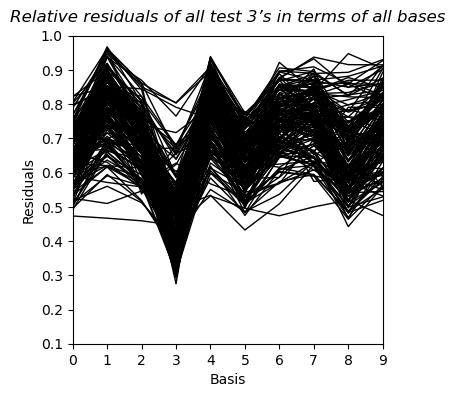

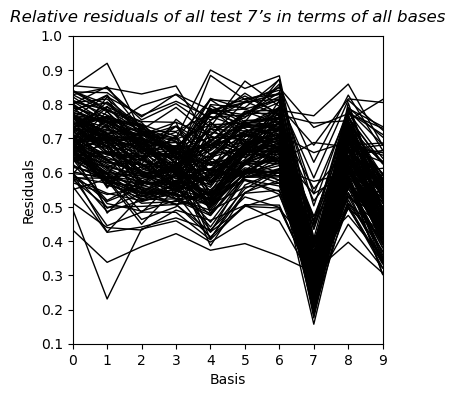

We can see that most of the test 3’s and 7’s are best approximated in terms of their own basis.
The graphs also provide information about which classification errors are more likely than others.
For example 3 and 4 are different, whereas 3 and 5 quite similar. Also 7 is very identical to 1, but unlike 6 or 8.


In [5]:
# The funcion plots the relative residuals of a given digit, data_base, basis in terms of all basis
# For example we plot 3's and 7's residuals, using ten (k=10) basic vectors for each digit class
def digit_res_plot(x,y,k2):
    m=[]
    for i in range(test_data.shape[1]):
        if test_models.loc[0,i]==x:
            m.append(i)
        
    residual=np.zeros((10,len(m)))  
    
    for i in m:
        res=[]
        for j in range(10):
            u=train_u[j][:,:k2]
            res.append(np.linalg.norm(np.dot(I-np.dot(u,u.T), y[i]))/np.linalg.norm(y[i]))
        res=np.array(res)
        residual=np.hstack((residual,res.reshape(-1,1)))
    fig=plt.figure(figsize=(4,4))
    ax=fig.add_subplot(111)
    ax.set_title('Relative residuals of all test '+str(x)+'’s in terms of all bases', style='italic',pad=10.0)
    ax.plot(residual,c='black', linewidth=1.0)
    ax.set_xticks(np.arange(0,10))
    ax.set_xlim([0,9])
    ax.set_ylim([0.1,1])
    ax.set_xlabel('Basis')
    ax.set_ylabel('Residuals')
    print('\n\n')
    plt.show()


digit_res_plot(3, test_data, 10)
digit_res_plot(7, test_data, 10)
print('We can see that most of the test 3’s and 7’s are best approximated in terms of their own basis.'
      '\nThe graphs also provide information about which classification errors are more likely than others.'
      '\nFor example 3 and 4 are different, whereas 3 and 5 quite similar. Also 7 is very identical to 1, but unlike 6 or 8.')

In [6]:
# We now check the model's accuracy for each number
# Digits 2 and 5 perform the worst
digit_accuracy=[]
for i in range(10):
    count=np.where(test_models.loc[0,:]==i)
    digit_accuracy.append(accuracy_score(test_models.loc[0,count[0]], prediction[count[0],13]))

digits_score=pd.DataFrame({'Number':list(range(10)), 'Accuracy (%)':np.dot(digit_accuracy,100)}).set_index('Number')
digits_score=digits_score.style.set_caption('Accuracy of every digit class').set_table_styles([{'selector':'caption', 
'props':[('font-size', '16px'), ('text-align','center'), ('color','black'), ('font-style', 'italic'), ('font-weight', 'bold')] }])
display(digits_score)

,Accuracy (%)
Number,
0,98.885794
1,98.106061
2,89.898990
3,90.361446
4,92.500000
5,88.125000
6,95.882353
7,95.918367
8,92.168675


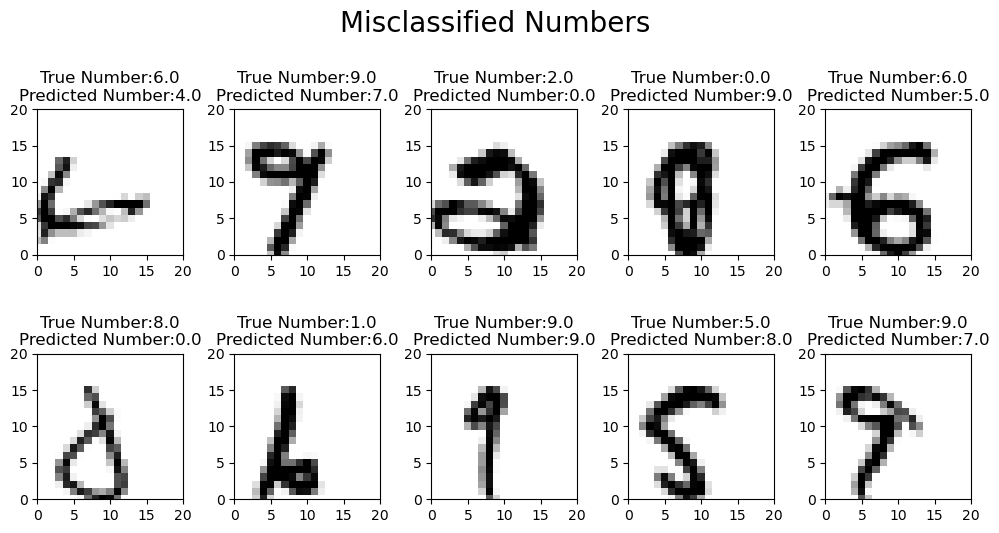

In [7]:
# Here we plot the misclassified digits and we can clearly see that most of them are indead very poorly written, 
# although we chose the number of basis with the best accuracy score (k=18), some of these digits are very poorly written
miss_digit=np.where(test_models.loc[0,:]!=prediction[:,13])
fig=plt.figure(figsize=(10,8))
col=5
fig.suptitle('Misclassified Numbers', size=20)
for i in range(5,15):
    wrong_d=miss_digit[0][i]
    number_image=np.array(test_data[wrong_d])
    plt.subplot(10//col + 1, col, i-4)
    plt.imshow(number_image.reshape(16,16)[::-1], cmap='binary', origin='lower')
    plt.xlim([0,20])
    plt.xticks(np.arange(0,25, step=5.0))
    plt.ylim([0,20])
    plt.title('True Number:'+str(test_models.loc[0,wrong_d])+'\nPredicted Number:'+str(prediction[wrong_d,15]))
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

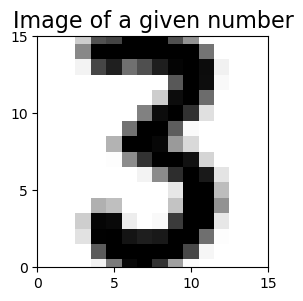

In [8]:
# The functions display the image of a given singular image, randomly selected from 'test_data.xlsx'
def number_id(vector):
    fig=plt.figure(figsize=(3,3))
    ax=fig.add_subplot(111)
    ax.imshow(np.array(vector).reshape(16,16)[::-1], cmap='binary', origin='lower')
    ax.set_xticks(np.arange(0,20, step=5.0))
    ax.set_yticks(np.arange(0,20, step=5.0))
    ax.set_xlim([0,15])
    ax.set_ylim([0,15])
    ax.set_title('Image of a given number', size=16)
    plt.show()
number_id(test_data.loc[:,np.random.randint(2007, size=None)])

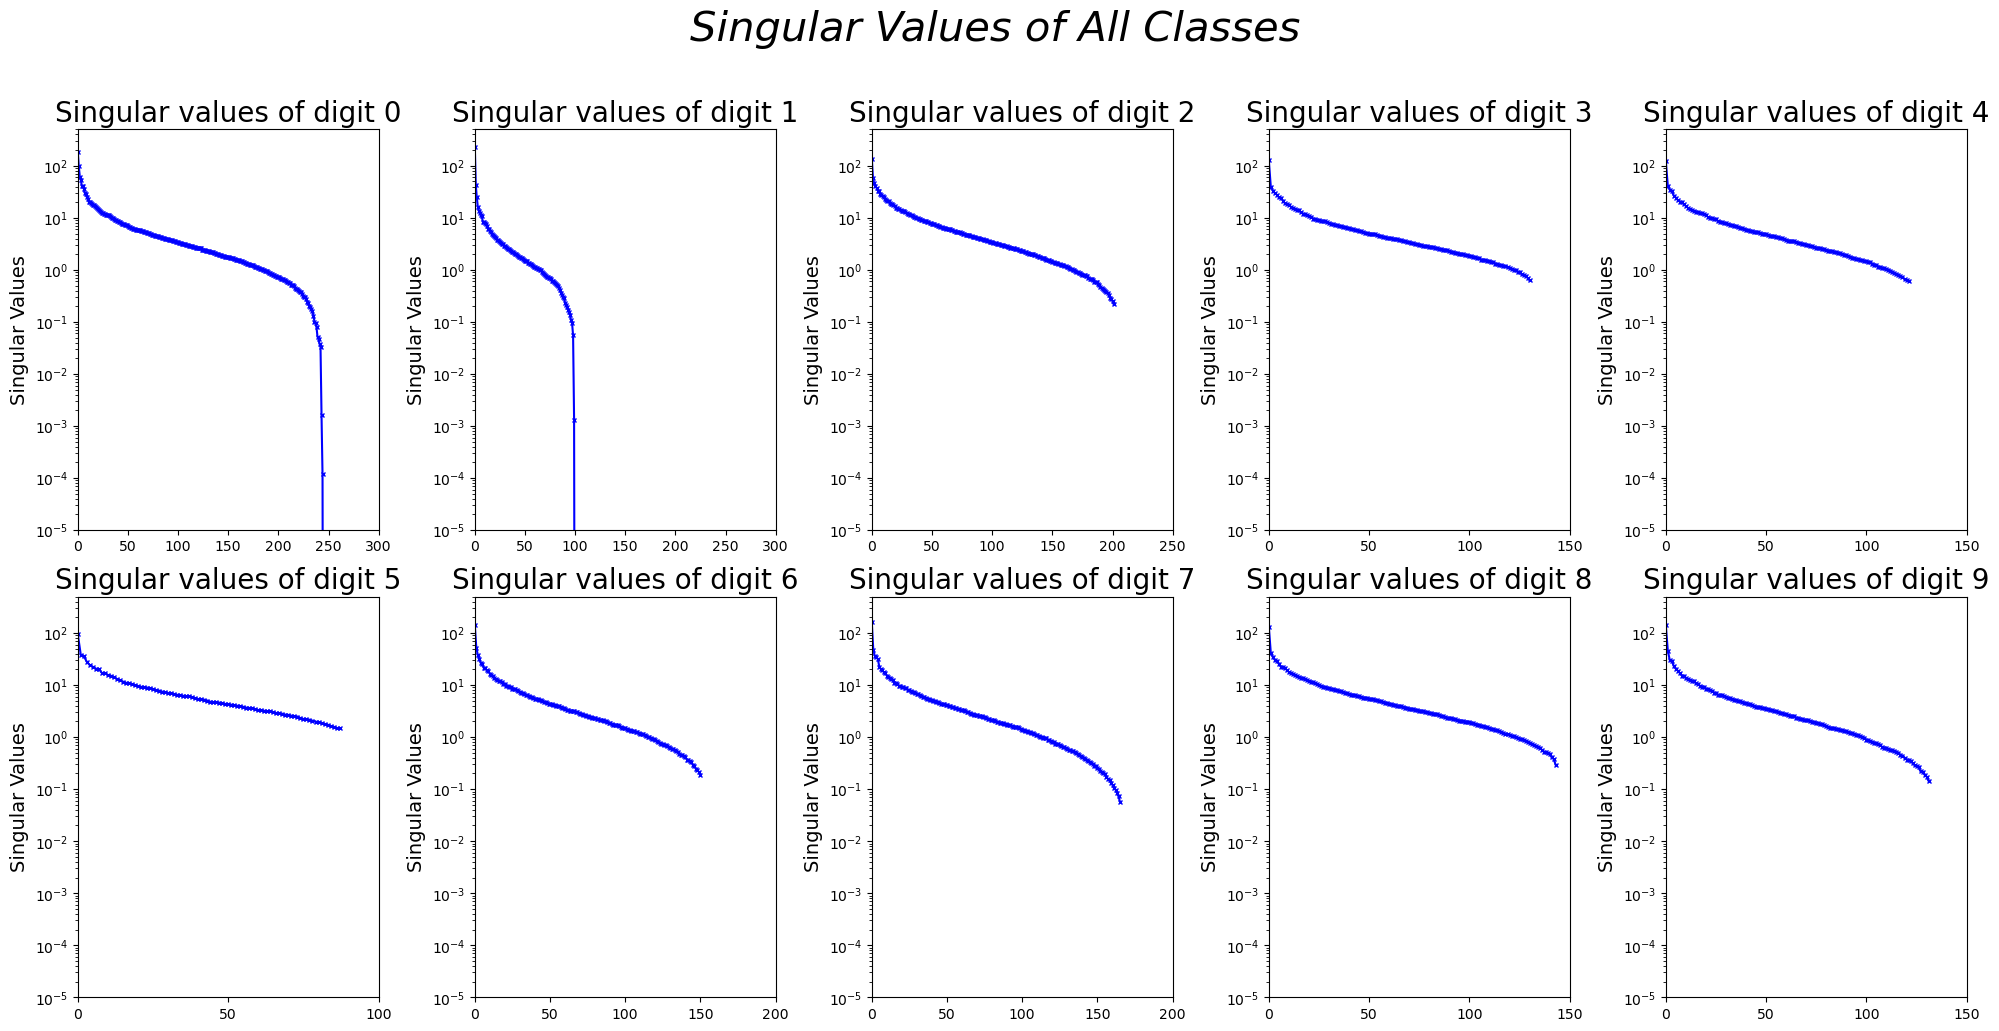

In [9]:
# Display the singular values of the different digit classes
fig=plt.figure(figsize=(20,15))
m=5
plt.suptitle('Singular Values of All Classes', size=30, style='italic')
for i in range(10):
    plt.subplot(10//m + 1, m, i+1)
    plt.plot(train_s[i], color='blue', marker='x', markersize=2.5)
    plt.title(f'Singular values of digit {i}', fontsize=20)
    plt.ylabel('Singular Values' ,fontsize=14)
    plt.ylim(10**-5,500)
    plt.xlim(0,train_s[i].shape[0])
    plt.xticks(np.arange(0,train_s[i].shape[0]+50, step=50))
    plt.yscale('log')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

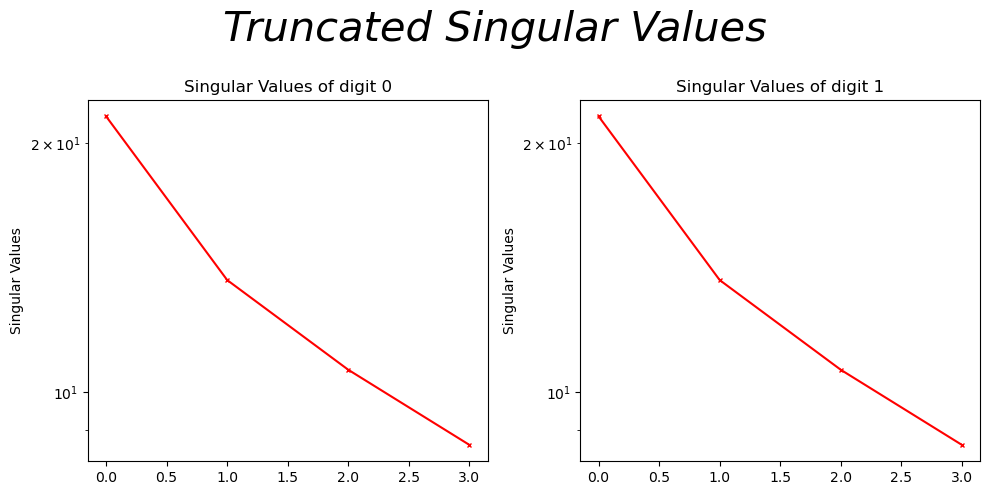

In [11]:
# We can see for example that the singular values of 0's and 1's decrease really fast
# espesially 1's. We use fewer basis vectors (k=5) for these two and plot the singular values 
# of the truncated SVD analysis

A0=A[0][:,:4]
A1=A[1][:,:4]
u0,s0,v0=np.linalg.svd(A0)
u1,s1,v1=np.linalg.svd(A1)
fig=plt.figure(figsize=(10,5))
plt.suptitle('Truncated Singular Values', size=30, style='italic')
ax1=plt.subplot(121)
ax1.plot(s0,color='red',marker='x',markersize=2.5)
ax1.set_title('Singular Values of digit 0')
ax1.set_ylabel('Singular Values')
ax1.set_yscale('log')

ax2=plt.subplot(122)
ax2.plot(s0,color='red',marker='x',markersize=2.5)
ax2.set_title('Singular Values of digit 1')
ax2.set_ylabel('Singular Values')
ax2.set_yscale('log')

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()